In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
import numpy as np
import joblib

%matplotlib inline

In [4]:
mailicious_files = ["bruteforce.csv", "capture_flood.csv", "capture_malariaDoS.csv", "malformed.csv", "slowite.csv"]
benign_files = ["capture_1w.csv", "normal.csv"]
#list of models that are trained, remove some to test fewer.
#model_names = ["isolation_forest", "random_forest", "k_means", "one_class_svm"]
model_names = ["random_forest"]
isolation_forest = None
random_forest = None
k_means = None
one_class_svm = None

In [5]:
df = pd.read_csv("all.csv")
df.head()

,index,packet_len,ip_len,ip_df,ip_mf,ip_ttl,tcp_len,tcp_pdu_size,tcp_ack,tcp_cwr,...,tcp_urg,tcp_src_port,tcp_dst_port,tcp_tdelta,tcp_l20_avg,mqtt_len,mqtt_topic_len,mqtt_msg_type,mqtt_qos_lvl,output
0,5380348,66,52,1,0,63,32,8,1,0,...,0,1883,35821,134,31,0,0,0,0,1
1,397915,66,52,1,0,64,32,8,1,0,...,0,35042,1883,30,-1216,0,0,0,0,0
2,11873128,66,52,1,0,64,32,8,1,0,...,0,44715,1883,45,0,0,0,0,0,1
3,2222605,66,52,1,0,64,32,8,1,0,...,0,52961,1883,53,1,0,0,0,0,1
4,11898510,66,52,1,0,64,32,8,1,0,...,0,59159,1883,64,0,0,0,0,0,1


In [6]:
def train_supervised(X, y):
    global random_forest, k_means, isolation_clf
    for model_name in model_names:
        if model_name == "random_forest":
            if random_forest == None:
                random_forest = RandomForestClassifier(max_depth=2, random_state=0)
            random_forest.fit(X, y)
            print("random_forest:", random_forest.score(X, y))    
        elif model_name == "k_means":
            if k_means == None:
                k_means = KMeans(n_clusters=2, random_state=0)
            k_means.fit(X)
            print("random_forest:", k_means.score(X, y))
            continue

In [7]:
def train_unsupervised(X):
    global random_forest, k_means, isolation_clf, one_class_svm
    for model_name in model_names:
        if model_names == "isolation_forest":
            if isolation_forest == None:
                isolation_forest = IsolationForest(random_state=0)
            isolation_forest.fit(X)   
        elif model_name == "one_class_svm":
            if one_class_svm == None:
                one_class_svm = OneClassSVM(gamma='auto')
            one_class_svm.fit(X)

In [9]:
def show_metrics(clf, X, y_test, y_pred_test):
    print("accuracy score: {}".format(accuracy_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))
    plot_roc_curve(clf, X_test, y_test)

In [20]:
def test(X, y):
    global random_forest, k_means, isolation_clf
    for model_name in model_names:
        if model_names == "isolation_forest":
            if isolation_clf == None:
                print("isolation_forest model not trained or fitted")
            else:
                print("isolation_forest:::")
                show_metrics(isolation_clf, X, y, isolation_clf.predict(X))
        elif model_name == "random_forest":
            if random_forest == None:
                print("Random_forest model not trained or fitted")
            else:
                print("random forest:::")
                show_metrics(random_forest, X, y, random_forest.predict(X))
        elif model_name == "k_means":
            if k_means == None:
                print("k_means model not trained or fitted")
            else:
                print("k_means:::")
                show_metrics(k_means, X, y, k_means.predict(X))

In [11]:
y = df['output'].to_numpy().ravel()
df = df.drop(['output', 'index'], axis=1)
X = df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
train_supervised(X_train, y_train)

random_forest: 0.922909510155193


random forest:::
accuracy score: 0.9228232062924687
              precision    recall  f1-score   support

           0       0.98      0.12      0.21    350042
           1       0.92      1.00      0.96   3647753

    accuracy                           0.92   3997795
   macro avg       0.95      0.56      0.59   3997795
weighted avg       0.93      0.92      0.89   3997795



/home/kaka/notes/ACN/pyacn/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


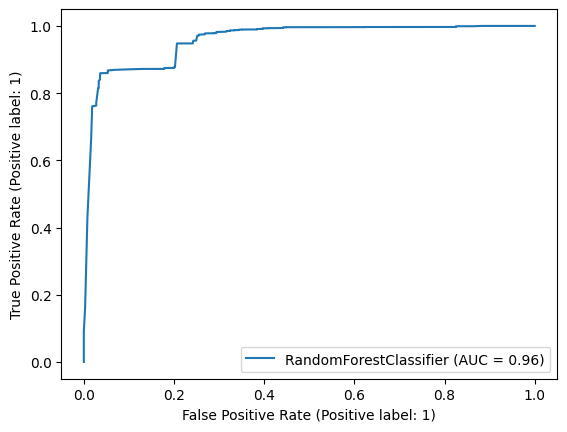

In [21]:
test(X_test, y_test)

In [19]:
joblib.dump(random_forest, 'random_forest.pkl')

['random_forest.pkl']